In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('archive/NationalNames.csv')


C:\Users\vilyi\AppData\Local\Temp\ipykernel_18448\950875881.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


1.Виведіть перші 8 рядків набору даних.

In [2]:
print(df.head(8))

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


Отримайте імена стовпців набору даних

In [3]:
print(df.columns)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


3. Отримайте імена стовпців набору данихх

In [4]:
print(df.groupby('Gender')['Name'].nunique())

Gender
F    64911
M    39199
Name: Name, dtype: int64


7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році

In [5]:
filtered_df=df[df['Year']==2010]
top_5_names=filtered_df.nlargest(5, 'Count')
print(top_5_names)


              Id      Name  Year Gender  Count
1657592  1657593  Isabella  2010      F  22883
1677392  1677393     Jacob  2010      M  22082
1657593  1657594    Sophia  2010      F  20612
1677393  1677394     Ethan  2010      M  17985
1657594  1657595      Emma  2010      F  17322


8. Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для
якого Count максимальне))

In [7]:
filt_year=1947
filtered_df=df[df['Year']==filt_year]
max_row_index = filtered_df['Count'].idxmax()
max_row = filtered_df.loc[max_row_index]
print( f"The name is {max_row['Name']} in {filt_year}")

The name is Linda in 1947


12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю
унікальних імен (тобто у 2008 році))

In [8]:
filt_year=df.groupby('Year')['Name'].nunique().idxmax()
filtred_df= df[df['Year'] == filt_year]
pop_name=filtred_df.nlargest( 1,'Count')
print(pop_name['Name'])

1608302    Jacob
Name: Name, dtype: object


13. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед
жіночих іменн

In [9]:
filtered_df = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]
print(filtered_df.nlargest(1,'Count'))

              Id   Name  Year Gender  Count
1455556  1455557  Jacob  2004      F    171


14. Знайти рік із найбільшою кількістю гендерно нейтральних імен
(однакові чоловічі та жіночі імена))

In [10]:
yearly_counts = df.groupby('Year')['Name'].nunique()
max_year = yearly_counts.idxmax()
print(max_year)

2008


15. Знайдіть загальну кількість народжень за рік.

In [11]:
total_births_per_year = df.groupby('Year')['Count'].sum()
print(total_births_per_year.head(5))

Year
1880    201484
1881    192699
1882    221538
1883    216950
1884    243467
Name: Count, dtype: int64


16. Знайдіть рік, коли народилося найбільше дітей

In [12]:
max_births_year = df.groupby('Year')['Count'].sum().idxmax()
print(max_births_year)

1957


17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного
року

In [13]:
gender_counts_per_year = df.groupby(['Year', 'Gender'])['Count'].sum()
gender_counts_df = gender_counts_per_year.unstack()
print(gender_counts_df.head(5))

Gender       F       M
Year                  
1880     90993  110491
1881     91954  100745
1882    107850  113688
1883    112321  104629
1884    129022  114445


19. Накресліть графік загальної кількості народжень хлопчиків та
дівчаток на рік.

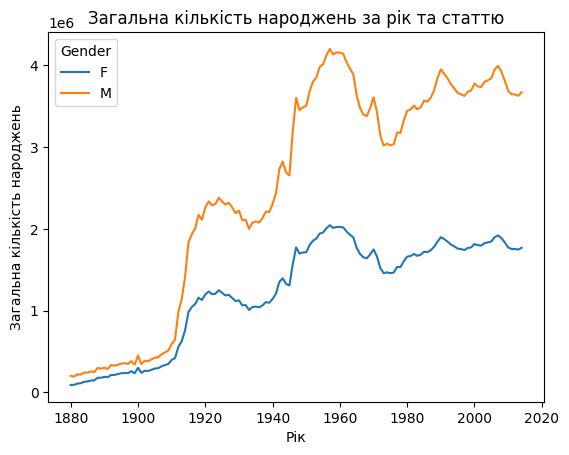

In [15]:
gender_counts_per_year = df.groupby(['Year', 'Gender'])['Count'].sum()
gender_counts_df = gender_counts_per_year.unstack()

gender_counts_df.plot( stacked=True)
plt.title('Загальна кількість народжень за рік та статтю')
plt.xlabel('Рік')
plt.ylabel('Загальна кількість народжень')
plt.show()

20. Підрахуйте кількість гендерно-нейтральних імен (однакових для
дівчат та хлопців)

In [16]:
name_counts = df.groupby('Name')['Gender'].nunique()
gender_neutral_names = name_counts[name_counts == 2]
count_gender_neutral_names = len(gender_neutral_names)
print(count_gender_neutral_names)

10221


22. Підрахуйте скільки років проводилось спостереження

In [17]:
min_year = df['Year'].min()
max_year = df['Year'].max()
observation_years = max_year - min_year + 1
print("Спостереження проводилось ",observation_years, "років")

Спостереження проводилось  135 років


24. Знайти найпопулярніше серед непопулярних імен (непопулярне
ім’я, яким називали дітей найбільшу кількість разів )

In [18]:
df_sort = df.sort_values(by='Count', ascending=False)

median_count = df_sort['Count'].median()
unpopular_names = df_sort[df_sort['Count'] < median_count]

most_popular_unpopular_name = unpopular_names['Name'].iloc[0]
count = unpopular_names['Name'].value_counts().iloc[0]
print(f"Найпопулярніше серед непопулярних імен: {most_popular_unpopular_name} {count} ")

Найпопулярніше серед непопулярних імен: Charleene 133 


25. Побудувати графіки розподілення кількості імен John та Mary по
роках без залежності до статі..

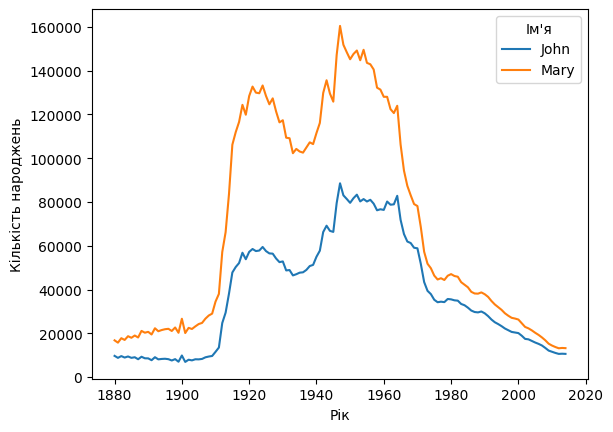

In [20]:
john_and_mary_df = df[df['Name'].isin(['John', 'Mary'])]
names_by_year = john_and_mary_df.groupby(['Year', 'Name'])['Count'].sum().unstack()

names_by_year.plot( stacked=True)
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.legend(title='Ім\'я')
plt.show()

26. Побудувати графіки розподілення кількості жіночих імен John та
чоловічих імен Mary по роках.

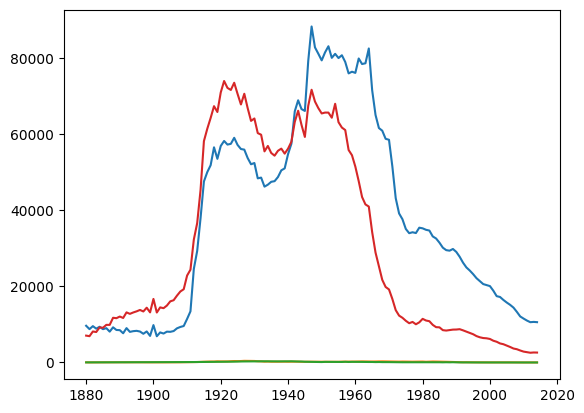

In [22]:
df_john_male = df[(df['Name'] == 'John') & (df['Gender'] == 'M')]
df_john_female = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]

df_mary_male = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]
df_mary_female = df[(df['Name'] == 'Mary') & (df['Gender'] == 'F')]

plt.plot(df_john_male['Year'], df_john_male['Count'])
plt.plot(df_john_female['Year'], df_john_female['Count'])
plt.plot(df_mary_male['Year'], df_mary_male['Count'])
plt.plot(df_mary_female['Year'], df_mary_female['Count'])
plt.show()


27. Знайти найпопулярніші імена в кожному році.

In [23]:
popular_names_by_year = df.groupby(['Year', 'Name']).agg({'Count': 'sum'})
most_popular_names_by_year = popular_names_by_year.groupby('Year').idxmax()
print(most_popular_names_by_year)

                 Count
Year                  
1880      (1880, John)
1881      (1881, John)
1882      (1882, John)
1883      (1883, John)
1884      (1884, John)
...                ...
2010  (2010, Isabella)
2011    (2011, Sophia)
2012    (2012, Sophia)
2013    (2013, Sophia)
2014      (2014, Emma)

[135 rows x 1 columns]
